In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
test=pd.read_csv('test.csv')

In [3]:
train = pd.read_csv('train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.shape

(891, 12)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train.isnull().sum()/train.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [8]:
train.Cabin.value_counts(dropna=False)

NaN            687
G6               4
B96 B98          4
C23 C25 C27      4
C22 C26          3
              ... 
E49              1
E46              1
C50              1
E40              1
B39              1
Name: Cabin, Length: 148, dtype: int64

In [9]:
#the number values which are repateed more than one 
sum(train.Cabin.value_counts(dropna=False) > 1)

47

In [10]:
#the number values which are repateed one 
sum(train.Cabin.value_counts(dropna=False) == 1)

101

In [11]:
#the ratio of unique values 
sum(train.Cabin.value_counts(dropna=False) == 1)/len(train.Cabin.unique())

0.6824324324324325

In [12]:
#since the unique values make more than of Cabin series, it shoul be dropped. 
train.drop(columns='Cabin', inplace=True)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [14]:
train.isnull().sum()/train.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.002245
dtype: float64

In [15]:
train.groupby(['Survived','Sex', 'Pclass' ])['Age'].mean()

Survived  Sex     Pclass
0         female  1         25.666667
                  2         36.000000
                  3         23.818182
          male    1         44.581967
                  2         33.369048
                  3         27.255814
1         female  1         34.939024
                  2         28.080882
                  3         19.329787
          male    1         36.248000
                  2         16.022000
                  3         22.274211
Name: Age, dtype: float64

In [16]:
train[train.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q
...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,S


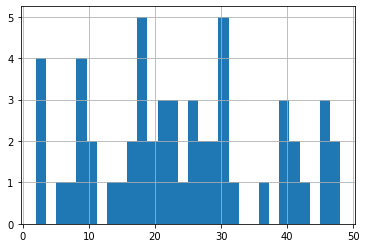

In [17]:
train[(train['Survived']==0) & (train['Sex']=='female') & (train['Pclass']== 3)]['Age'].hist(bins=30)

In [18]:
sum((train[(train['Survived']==0) & (train['Sex']=='female') & (train['Pclass']== 3)]['Age'].isnull()))

17

In [19]:
train[(train['Survived']==0) & (train['Sex']=='female') & (train['Pclass']== 3)]['Age'].describe()

count    55.000000
mean     23.818182
std      12.833465
min       2.000000
25%      15.250000
50%      22.000000
75%      31.000000
max      48.000000
Name: Age, dtype: float64

In [20]:
train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

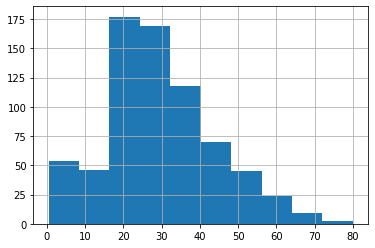

In [21]:
train.Age.hist()

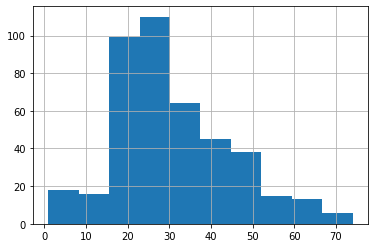

In [22]:
train[train.Survived==0]['Age'].hist()

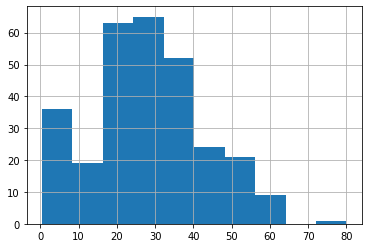

In [23]:
train[train.Survived==1]['Age'].hist()

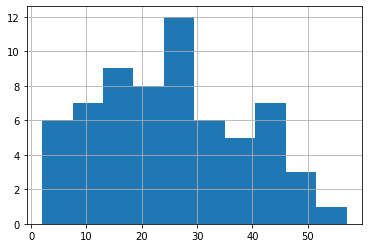

In [24]:
train[(train.Survived==0)&(train.Sex == 'female')]['Age'].hist()

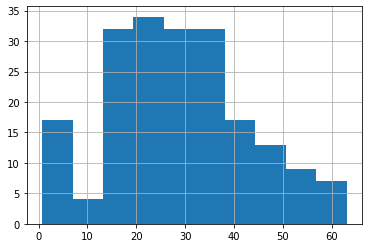

In [25]:
train[(train.Survived==1)&(train.Sex == 'female')]['Age'].hist()

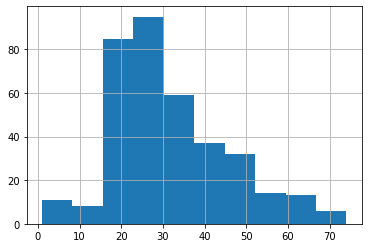

In [26]:
train[(train.Survived==0)&(train.Sex == 'male')]['Age'].hist()

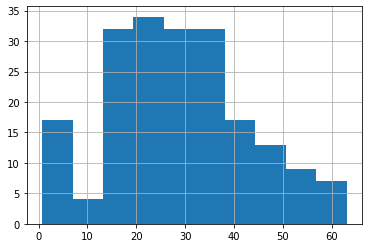

In [27]:
train[(train.Survived==1)&(train.Sex == 'female')]['Age'].hist()

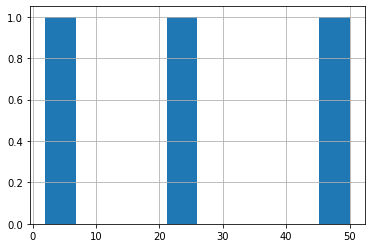

In [28]:
train[(train.Survived==0)&(train.Sex == 'female')&(train.Pclass == 1)]['Age'].hist()

In [29]:
def fill_na(x):
    col = list(x.columns)
    first= x['Survived'].unique()
    second= x['Sex'].unique()
    third= x['Pclass'].unique()
    for i in first:
        for j in second:
            for k in third:
                liste = list(x[(x['Survived']==i)&(x['Sex']==j)&(x['Pclass']==k)].index)
                a=x[(x['Survived']==i)&(x['Sex']==j)&(x['Pclass']==k)].mode()
                if a.shape[0] > 0:
                    a=a.iloc[0]
                    for c in col:
                        for t in liste:
                            if pd.isna(x.loc[t, c]):
                                x.loc[t,c] = a[c]
                else:
                    continue

In [30]:
fill_na(train)

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [32]:
train = pd.get_dummies(train, columns=['Sex'])

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
 10  Sex_female   891 non-null    uint8  
 11  Sex_male     891 non-null    uint8  
dtypes: float64(2), int64(5), object(3), uint8(2)
memory usage: 71.5+ KB


In [36]:
train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,0,1


In [37]:
train.drop(columns='Sex_male', inplace=True)

In [40]:
train.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [41]:
train = pd.get_dummies(train, columns=['Embarked'])

In [42]:
train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,0,0,1


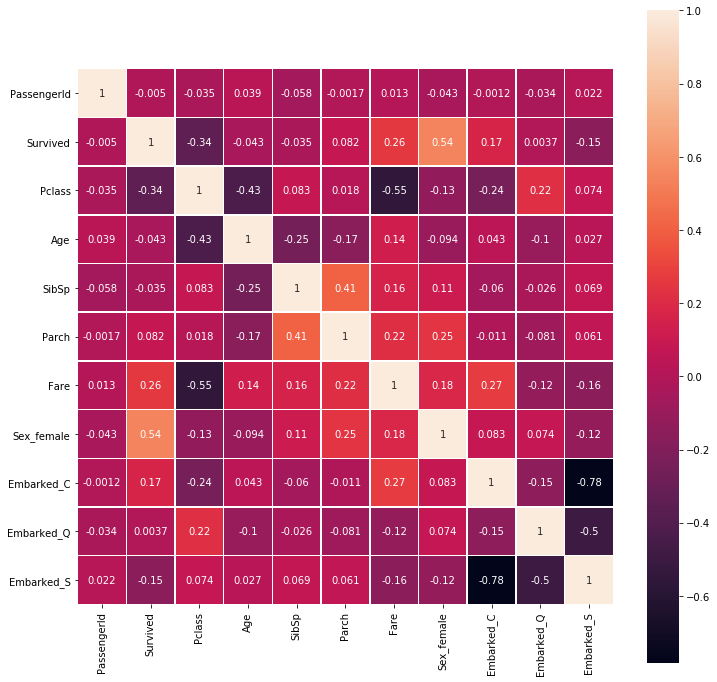

In [43]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(train.corr(), square=True, linewidths=.5, annot=True)


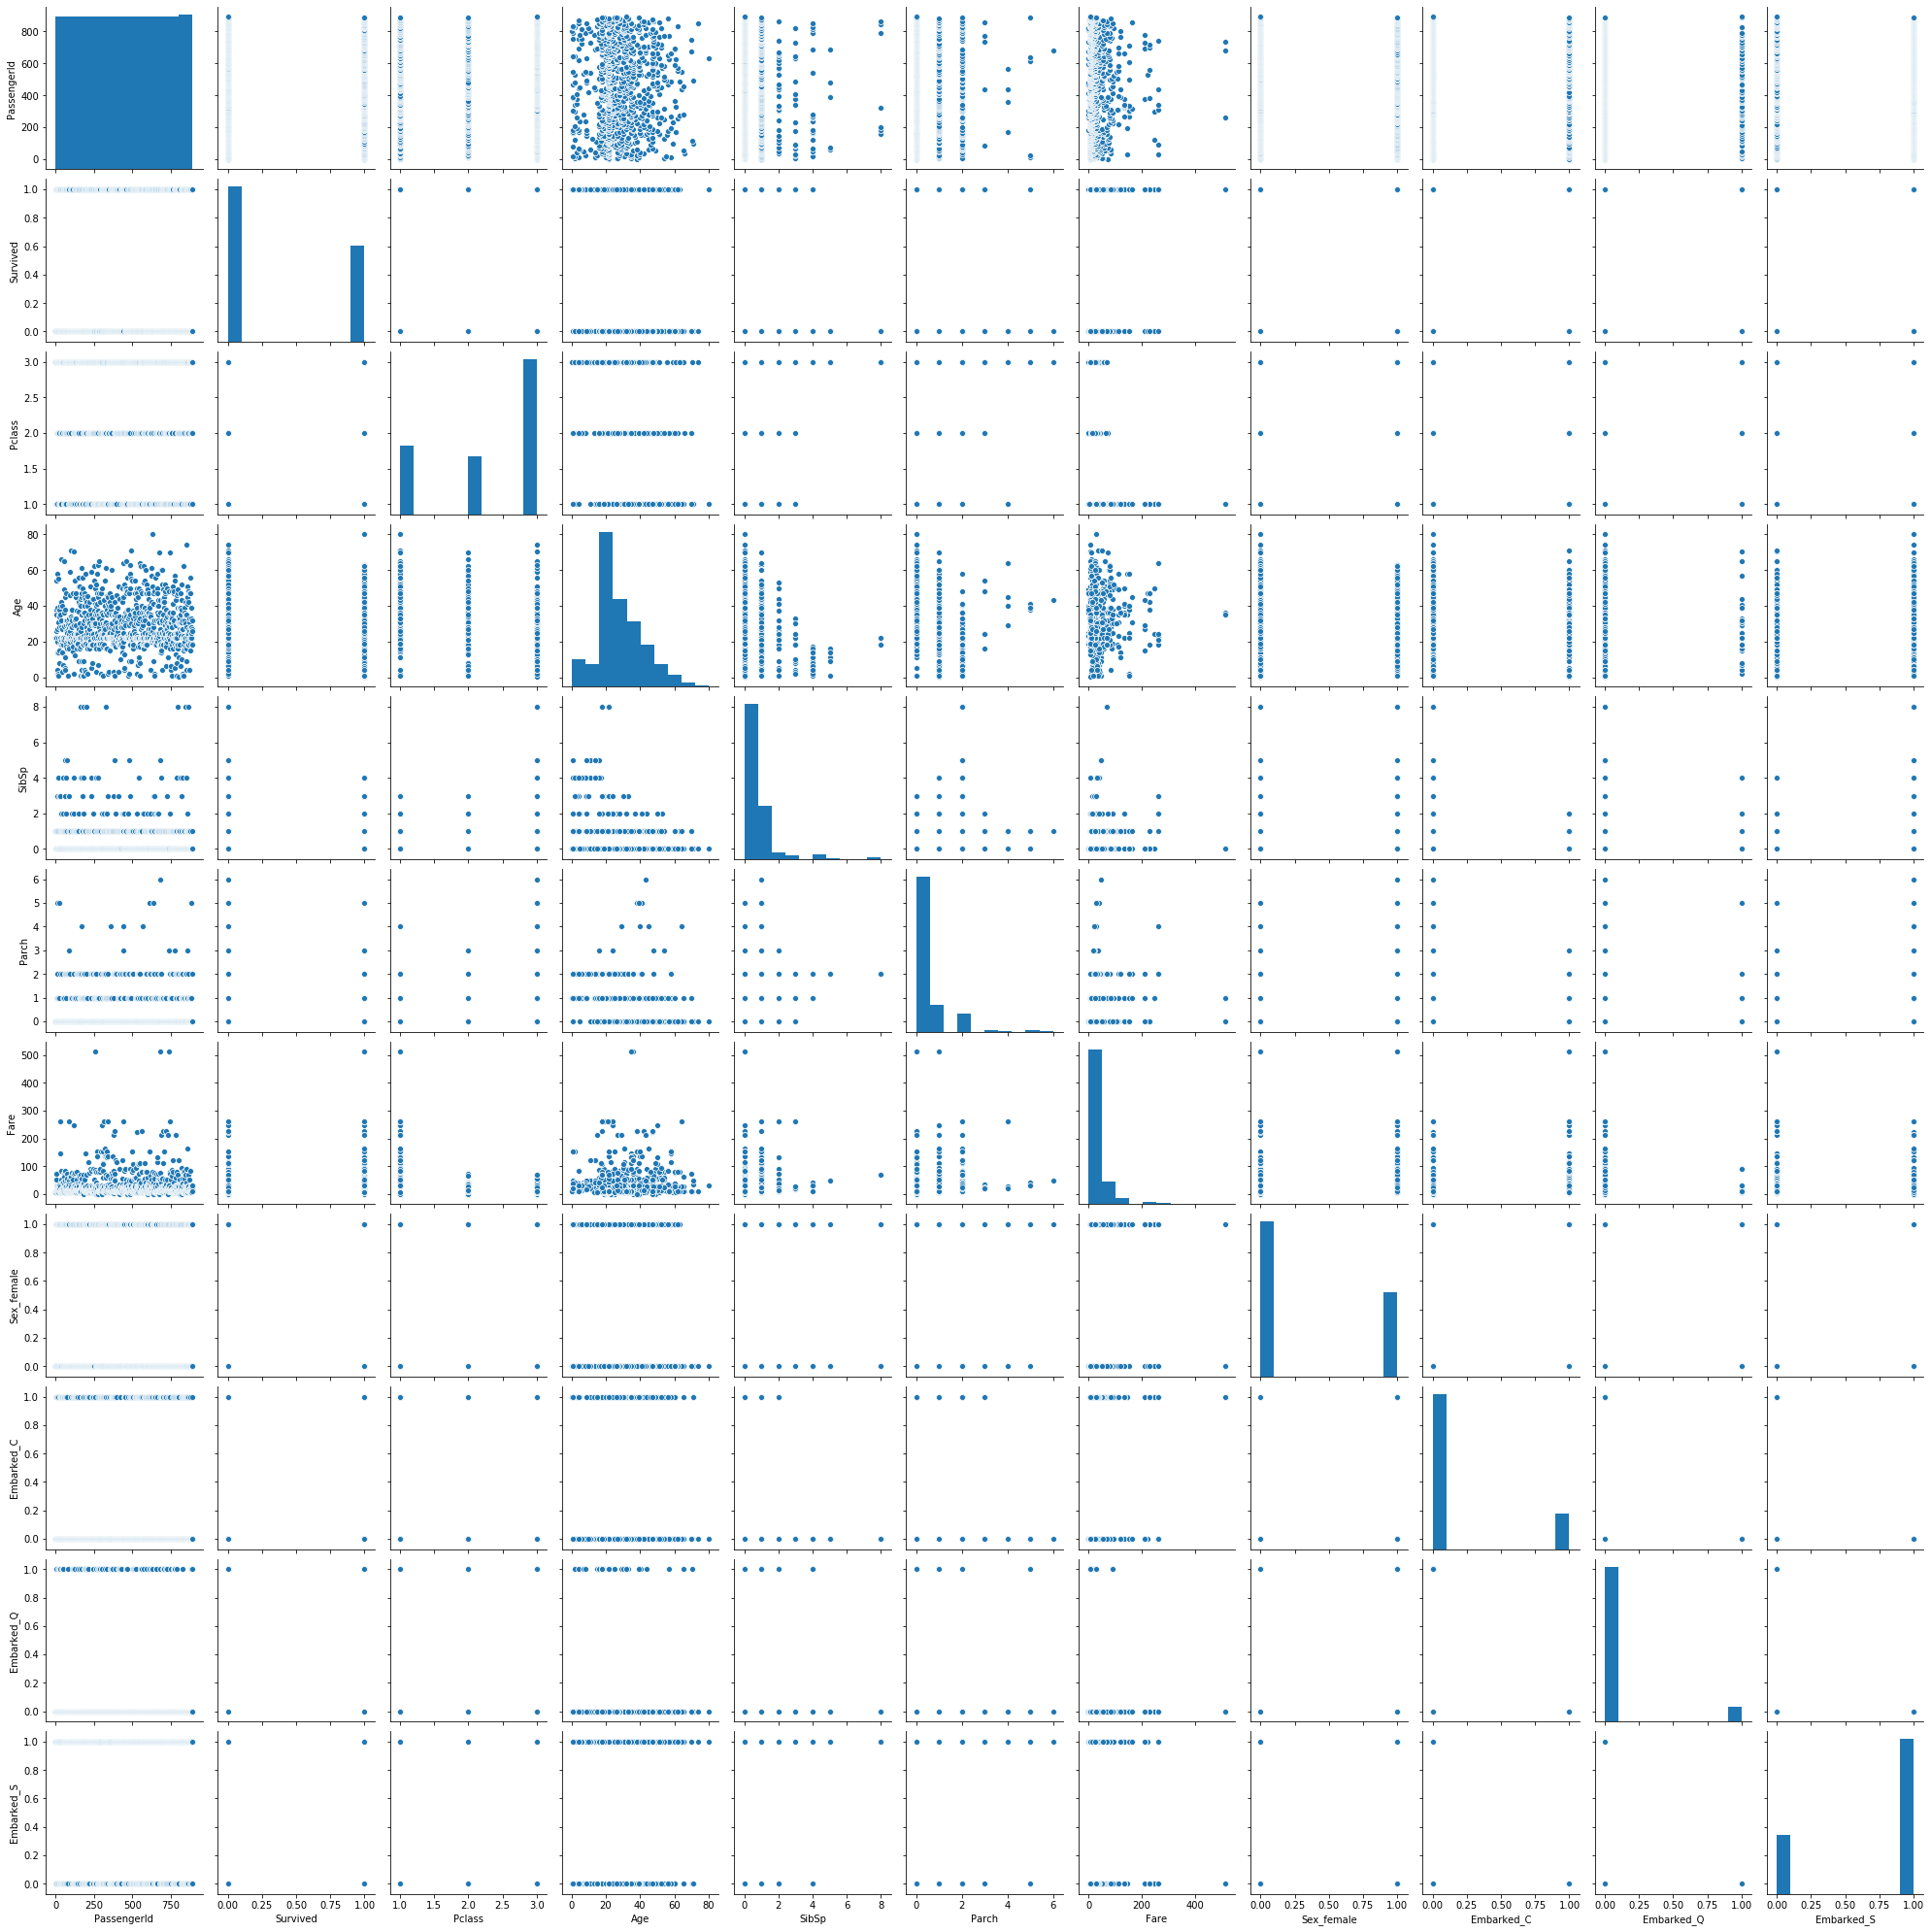

In [44]:
sns.pairplot(train)

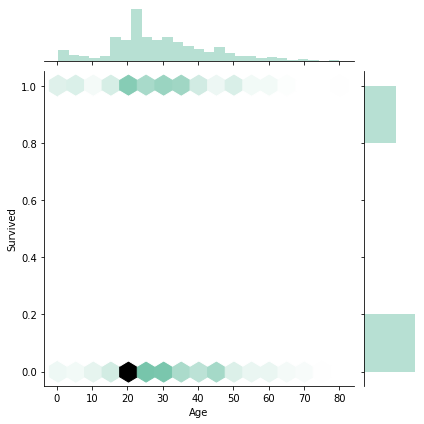

In [46]:
sns.jointplot(x='Age', y='Survived', data= train, kind="hex", color="#4CB391")

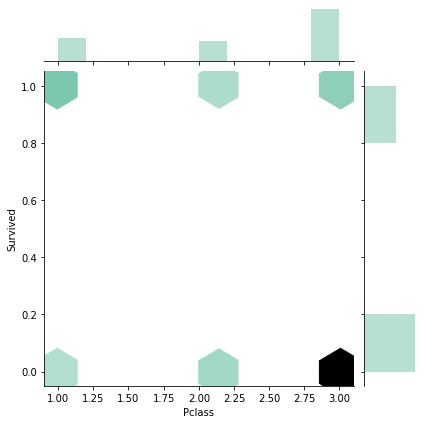

In [47]:
sns.jointplot(x='Pclass', y='Survived', data= train, kind="hex", color="#4CB391")

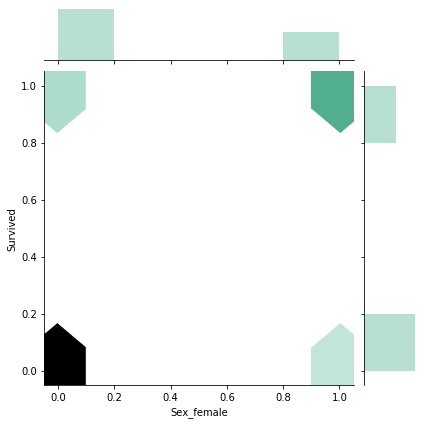

In [50]:
sns.jointplot(x='Sex_female', y='Survived', data= train, kind="hex", color="#4CB391")

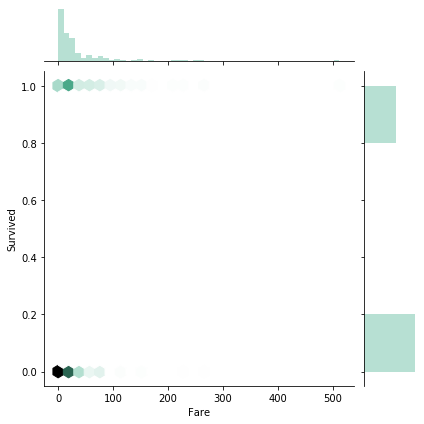

In [52]:
sns.jointplot(x='Fare', y='Survived', data= train, kind="hex", color="#4CB391")

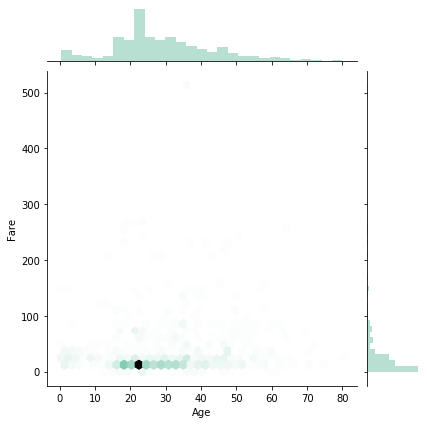

In [53]:
sns.jointplot(x='Age', y='Fare', data= train, kind="hex", color="#4CB391")

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm

In [55]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Sex_female', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [56]:
x= train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Embarked_C', 'Embarked_Q','Embarked_S']]
y= train['Survived']

In [58]:
model = sm.Logit(y, x)

In [59]:
result = model.fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.440295
         Iterations 6


In [60]:
result.params

Pclass       -1.183847
Age          -0.039955
SibSp        -0.340131
Parch        -0.084115
Fare          0.001900
Sex_female    2.714521
Embarked_C    2.711563
Embarked_Q    2.570390
Embarked_S    2.337424
dtype: float64

In [63]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      882
Method:                           MLE   Df Model:                            8
Date:                Sun, 15 Nov 2020   Pseudo R-squ.:                  0.3388
Time:                        00:50:39   Log-Likelihood:                -392.30
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 6.828e-82
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass        -1.1838      0.151     -7.839      0.000      -1.480      -0.888
Age           -0.0400      0.008     -5.075      0.000      -0.055      -0.025
SibSp         -0.3401      0.109     -3.124      0.002      -0.554      -0.127
Parch         -0.0841      0.119     -0.706      0.480      -0.318       0.149
Fare           0.0019      0.002      0.794      0.427      -0.003       0.007
Sex_female     2.7145      0.201     13.497      0.000       2.320       3.109
Embarked_C     2.7116      0.539      5.035      0.000       1.656       3.767
Embarked_Q     2.5704      0.629      4.084      0.000       1.337       3.804
Embarked_S     2.3374      0.518      4.509      0.000       1.321       3.353
==============================================================================
"""

In [64]:
x= train[['Pclass', 'Age', 'SibSp', 'Sex_female', 'Embarked_C', 'Embarked_Q','Embarked_S']]
y= train['Survived']

In [65]:
model = sm.Logit(y, x)

In [66]:
result = model.fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.440842
         Iterations 6


In [67]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      884
Method:                           MLE   Df Model:                            6
Date:                Sun, 15 Nov 2020   Pseudo R-squ.:                  0.3380
Time:                        00:53:01   Log-Likelihood:                -392.79
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.642e-83
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass        -1.2428      0.133     -9.310      0.000      -1.504      -0.981
Age           -0.0401      0.008     -5.107      0.000      -0.055      -0.025
SibSp         -0.3454      0.103     -3.350      0.001      -0.548      -0.143
Sex_female     2.6927      0.196     13.750      0.000       2.309       3.076
Embarked_C     2.9071      0.473      6.140      0.000       1.979       3.835
Embarked_Q     2.7692      0.584      4.741      0.000       1.624       3.914
Embarked_S     2.4979      0.473      5.281      0.000       1.571       3.425
==============================================================================
"""